When the observations are more accurate than 1.0 I, (say cov <1.0 I), then 1.0I  gives a better filtering in
the sense that the experiment does not fail. Ob 4 has the cases when the assimilations are sustained for all time
without failing, for such cases as they have been assimilated with 1.0 I as the assumed observation covariance.
(which is over estimating the observation covariance).

This could be useful when your goal is filtering, not forecasting.

0.16

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import seaborn as sns
from cmcrameri import cm

mpl.rcParams['lines.markersize']=10
mpl.rcParams['axes.titlesize']=30
mpl.rcParams['legend.fontsize']=20
mpl.rcParams['xtick.labelsize']=15
mpl.rcParams['ytick.labelsize']=15
mpl.rcParams['axes.labelsize']=20

In [16]:
# Change here for different observation gap and observation covariance parameter
mu=0.7
ob_gap=0.05
k=4
N=20 
loc_fun='gaspri'
l_scale=4
alpha=1.0
ob_dim=20
ecov=2.0 

ebias=4.0     

trajectory_path='/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/L96-40/assimilated_trajs_seed_3'
os.chdir(trajectory_path)

#load the state
state=np.load('state/Multiple_trajectories_N=1_gap=0.05_ti=0.0_tf=600.0_dt_0.05_dt_solver=0.01.npy')


# State and obs
os.chdir('..')
os.chdir(trajectory_path+'/ob{}'.format(k)) 
obs=np.load('ob{}_gap_{}_H2__mu={}_obs_cov1.npy'.format(k,ob_gap,mu))

#Go inside the data folder......................................
folder_label='ebias={}_ecov={}_obs={}_ens={}_mu={}_gap={}_alpha={}_loc=gaspri_r={}'.format(ebias, ecov,ob_dim,N,mu,ob_gap,alpha,l_scale)
print(os.getcwd())
os.chdir(folder_label)

#Load data....
a_ens=np.load('filtered_ens.npy') #ens has shape:=[time steps,system dimension,ensemble number]
a_mean=np.mean(a_ens,axis=2)
np.save('filter_mean.npy',a_mean)

/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/L96-40/assimilated_trajs_seed_3/ob4


In [17]:
# Change here for different observation gap and observation covariance parameter
mu=0.1
ob_gap=0.05
k=4
N=20 
loc_fun='gaspri'
l_scale=4
alpha=1.0
ob_dim=20
ecov=2.0 
ebias=4.0     



# State and obs
os.chdir(trajectory_path+'/ob{}'.format(k)) 
obs=np.load('ob{}_gap_{}_H2__mu={}_obs_cov1.npy'.format(k,ob_gap,mu))

#Go inside the data folder......................................
folder_label='ebias={}_ecov={}_obs={}_ens={}_mu={}_gap={}_alpha={}_loc=gaspri_r={}'.format(ebias, ecov,ob_dim,N,mu,ob_gap,alpha,l_scale)
print(os.getcwd())
os.chdir(folder_label)

#Load data....
a1_ens=np.load('filtered_ens.npy') #ens has shape:=[time steps,system dimension,ensemble number]
a1_mean=np.mean(a1_ens,axis=2)

/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/L96-40/assimilated_trajs_seed_3/ob4


In [4]:
# os.chdir('/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/L96-40/assimilated_trajs/')
# os.mkdir('mu={}_times_I20'.format(mu))
# os.chdir('mu={}_times_I20'.format(mu))
# np.save('filter_mean.npy',a1_mean)         

In [18]:
time=ob_gap*np.arange(a_mean.shape[0])

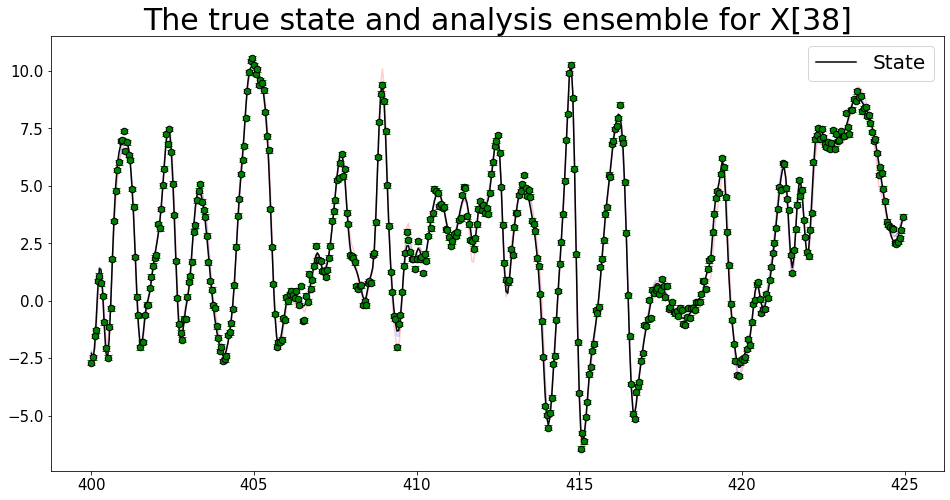

In [19]:
plt.figure(figsize=(16,8))
# Start time and end time chosen to view a part of time series
t_start=8000
t_stop=8500
# component to view
comp_=38
#plt.plot(time[t_start:t_stop],a1_mean[t_start:t_stop,comp_],c='r',alpha=1)

plt.plot(time[t_start:t_stop],a_mean[t_start:t_stop,comp_],c='r',alpha=0.2)
plt.plot(time[t_start:t_stop],a1_mean[t_start:t_stop,comp_],c='blue',alpha=0.2)
plt.plot(time[t_start:t_stop],state[t_start:t_stop,comp_],c='black',label='State')
if (comp_%2==0):
    #plt.scatter(time[t_start:t_stop],obs[t_start:t_stop,int(comp_/2)],c='black',edgecolors='black',marker='.',s=150,label='obs')
    plt.errorbar(x=time[t_start:t_stop],y=obs[t_start:t_stop,int(comp_/2)],yerr=mu,c='g',mec='black',mfc='g',capsize=4,fmt='.',ms=13)
plt.legend()

plt.title(r'The true state and analysis ensemble for X[{}]'.format(comp_))
#plt.xticks(time[t_start:t_stop],fontsize=12)
plt.legend(frameon='True')
#plt.savefig('overfit_2.png')

In [41]:
err=state-a1_mean

In [42]:
# scaled-RMSE 
t_start=1000
model_dim=40
print(np.sqrt(np.mean(np.sum((err[t_start:t_stop])**2,axis=1),axis=0)/model_dim))
#print(mu)

0.17184039932686274


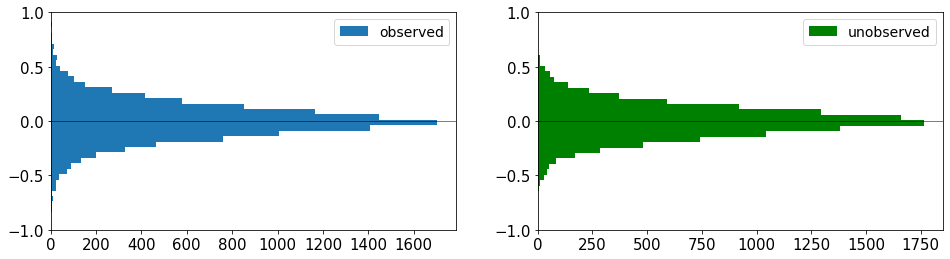

In [48]:
w=0.05
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
data=err[500:,9]
plt.hist(data,bins=np.arange(min(data), max(data) + w, w),fill=True,label='{}'.format('observed'),orientation='horizontal')
plt.axhline(0,c='black',lw=0.5)
plt.ylim(-1,1)
plt.legend(fontsize=14)

plt.subplot(1,2,2)
data=err[500:,10]
plt.hist(data,bins=np.arange(min(data), max(data) + w, w),label='{}'.format('unobserved'),lw=0.8,color='g',orientation='horizontal')
plt.ylim(-1,1)
plt.axhline(0,c='black',lw=0.5)
plt.legend(fontsize=14)

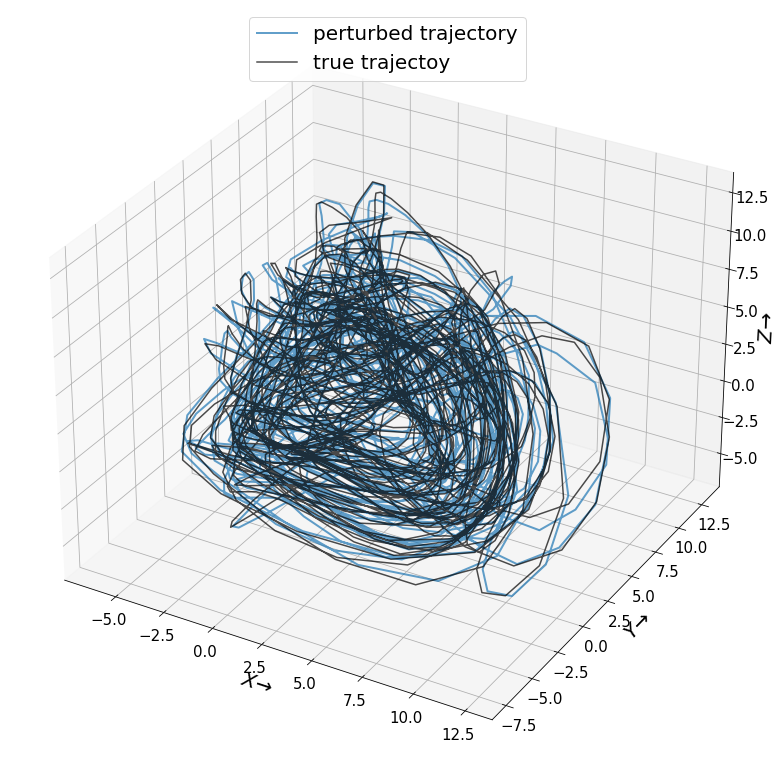

In [40]:
#plot the state and the trajectory
fig = plt.figure(figsize=(14,14))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# plotting
ax.plot3D(a_mean[1000:3000,0],a_mean[1000:3000,1],a1_mean[1000:3000,2],label='perturbed trajectory',alpha=0.7,linestyle='-',lw=2)
ax.plot3D(state[1000:3000,0],state[1000:3000,1],state[1000:3000,2],label='{}'.format('true trajectoy'),c='black',alpha=0.7)

ax.set_xlabel(r'$X\to$')
ax.set_ylabel(r'$Y\to$')
ax.set_zlabel(r'$Z\to$')
plt.legend(loc='upper center')
#os.chdir('/home/shashank/Dropbox/Data_Assimilation/Thesis_writing/figures')
#plt.savefig('/home/shashank/Dropbox/Data_Assimilation/Thesis_writing/figures/perturbed_true.png')

In [42]:
print(np.sqrt(np.mean(np.sum((state[t_start+500:]-a1_mean[t_start+500:])**2,axis=1),axis=0)/40))

0.17201706302590405


min_rmse 1.0574591104169972
max_rmse 2.201750974080217


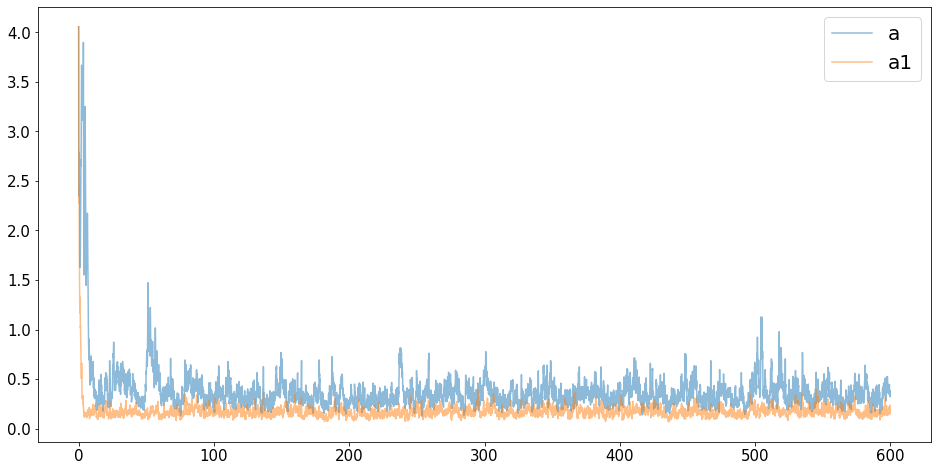

In [64]:
plt.figure(figsize=(16,8))
t_start=0
t_stop=12000
plt.plot(time[t_start:t_stop],np.sqrt(np.sum((state[t_start:t_stop]-a_mean[t_start:t_stop])**2,axis=1))/np.sqrt(40),linestyle='solid',alpha=0.5,label='a')
plt.plot(time[t_start:t_stop],np.sqrt(np.sum((state[t_start:t_stop]-a1_mean[t_start:t_stop])**2,axis=1))/np.sqrt(40),linestyle='solid',alpha=0.5,label='a1')
print('min_rmse',np.mean(np.sqrt(np.sum((state[t_start+1000:t_stop]-a1_mean[t_start+1000:t_stop])**2,axis=1))))
print('max_rmse',np.mean(np.sqrt(np.sum((state[t_start+1000:t_stop]-a_mean[t_start+1000:t_stop])**2,axis=1))))
plt.legend()

In [20]:
sn=np.zeros((a_ens.shape[0],2))
for i in range(a_ens.shape[0]):
    sn[i,0]=np.sqrt(np.trace(np.cov(a_ens[i],rowvar=True))/40)
    sn[i,1]=np.sqrt(np.trace(np.cov(a1_ens[i],rowvar=True))/40)

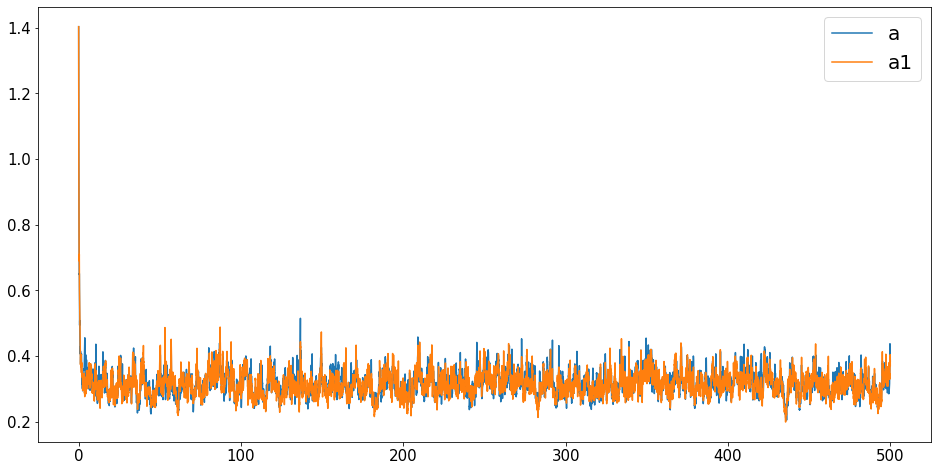

In [21]:
plt.figure(figsize=(16,8))

plt.plot(time[t_start:t_stop],sn[t_start:t_stop,0],label='a')
plt.plot(time[t_start:t_stop],sn[t_start:t_stop,1],label='a1')
plt.legend()

In [ ]:
# Difference between an assimilated trajectory and a noisy trajectory

The case of overfitting for the observation inflation 1.01 for ob5 case in <1.0I cases.
